In [171]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep
from bs4 import BeautifulSoup
import requests
import re
import os
import shutil

In [172]:
USERNAME = "kuma_00111"
PASSWORD = "Mii103210"

In [173]:
driver = webdriver.Chrome("C:\DATA\down\chromedriver\chromedriver")
target_url = "https://www.instagram.com/"
driver.get(target_url)
sleep(3)

C:\Users\yuji_\AppData\Local\Temp\ipykernel_8612\617658327.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\DATA\down\chromedriver\chromedriver")


In [174]:
error_flg = False

In [175]:
try:
    username_input = driver.find_element(By.XPATH,"//input[@aria-label='電話番号、ユーザーネーム、メールアドレス']")
    username_input.send_keys(USERNAME)
    sleep(1)
    password_input = driver.find_element(By.XPATH,"//input[@aria-label='パスワード']")
    password_input.send_keys(PASSWORD)
    sleep(1)

    login_button = driver.find_element(By.XPATH,"//button[@type='submit']")
    login_button.submit()
    sleep(1)

except Exception:
    error_flg = True
    print("ユーザー名、パスワード入力時にエラーが発生しました")

In [176]:
if error_flg is False:
    try:
        sleep(3)
        notnow_button = driver.find_element(By.XPATH,"//button[text()='後で']")
        notnow_button.click()
    
    except Exception:
        pass

In [177]:
target_username = "paulnicklen"
if error_flg is False:
    try:
        target_profile_url = target_url + target_username
        driver.get(target_profile_url)
        sleep(3)
    except Exception:
        print("検索時にエラーが発生しました")
        error_flg = True

投稿件数:3345件
画像番号:0 image[src]:

画像番号:1 image[src]:

画像番号:2 image[src]:https://scontent.cdninstagram.com/v/t51.2885-19/18949848_119034868685107_8565000206607712256_a.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent.cdninstagram.com&_nc_cat=107&_nc_ohc=JRvoKrakQUAAX8nvAaz&edm=APs17CUBAAAA&ccb=7-5&oh=00_AfDPluMBBwGpBKfISlC0dxjQzKhfH6zkzBG5eS4YXWzyZg&oe=64AABE64&_nc_sid=10d13b

画像番号:3 image[src]:https://scontent-nrt1-1.cdninstagram.com/v/t51.2885-19/93756524_253798018988532_1669202571023089664_n.jpg?stp=dst-jpg_s320x320&_nc_ht=scontent-nrt1-1.cdninstagram.com&_nc_cat=1&_nc_ohc=DtIrvegf99gAX-Rn4qb&edm=AOQ1c0wBAAAA&ccb=7-5&oh=00_AfDp7MtRTexTwNRbLsImWqi2_AHR-OfUFWrmji8cMFOuUg&oe=64AA0383&_nc_sid=8b3546

画像番号:4 image[src]:https://scontent-nrt1-1.cdninstagram.com/v/t51.2885-15/120036300_244428553654500_1929639767703625721_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-nrt1-1.cdninstagram.com&_nc_cat=100&_nc_ohc=XLtepJYoxdEAX80hexz&edm=AGW0Xe4BAAAA&ccb=7-5&oh=00_AfAGnh706pule3We5nK1TG2E9HKfKY6-LDgasAU9EdphSg
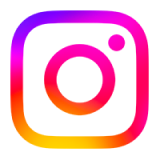
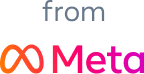
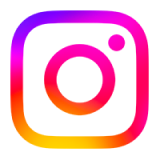
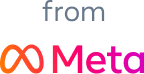
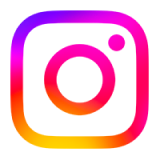
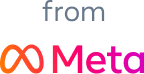
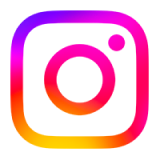
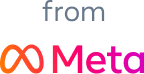
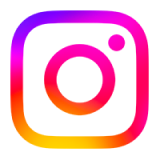
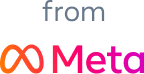
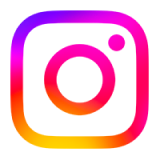
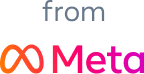

In [178]:
if error_flg is False:
  try:
    post_count = driver.find_element(By.XPATH,"//li[text()='投稿']").text
    post_count = post_count.replace('投稿','').replace('件','')
    print(f"投稿件数:{post_count}件")
    post_count = int(post_count)
    if post_count > 12 :
      scroll_count = int(post_count/12) + 1
      try:
        all_images = []
        for i in range(scroll_count):
          soup = BeautifulSoup(driver.page_source,"html.parser")
          for img in soup.find_all('img'):
            all_images.append(img)
          driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
          sleep(1)
          if i > 5 :
            break
          all_images = list(dict.fromkeys(all_images))
          for index,image in enumerate(all_images):
            print(f"画像番号:{index} image[src]:{image['src']}",end="\n\n")
      except Exception:
        print("画面スクロール中にエラーが発生しました")
  except Exception:
    print("投稿数を取得できませんでした。")
    error_flg = True

In [179]:
path = r"C:\xampp\htdocs\python\scraping\00_output\photo"

if error_flg is False:
    try:
        for key,image in enumerate(all_images):
            filename=f"image_{str(key)}.jpg"
            image_path = os.path.join(path,filename)
            image_link = image["src"]

            url_ptn = re.compile(r"^(http|https)://")
            res = url_ptn.match(image_link)
            if res:
                response = requests.get(image_link,stream=True)
                with open(image_path,"wb") as file:
                    shutil.copyfileobj(response.raw,file)
    except Exception as e:
        print(e)
        print(f"{str(key)}番目の画像ダウンロード・保存時にエラーが発生しました")
        print(f"エラー画像のパス:{image_link}")
